# 05. 회귀
- 분류의 예측값은 카테고리와 같은 이산형 클래스, 회귀는 연속형 숫자 값
- 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)을 최소화하는 직선형 회귀선을 최적화
 - 일반 선형 회귀
 - 릿지(Ridge)
 - 라쏘(Lasso)
 - 엘라스틱넷(ElasticNet)
 - 로지스틱 회귀(분류에 사용되는 선형 모델)

## 1. 단순 선형 회귀
- 독립변수 하나, 종속변수 하나
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀는 잔차 값의 합이 최소가 되는 모델
- RSS : 오류 값의 제곱을 구해서 더하는 방식
- 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라고 함.

## 2. 비용 최소화하기 - 경사 하강법(Gradient Descent)
- 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식

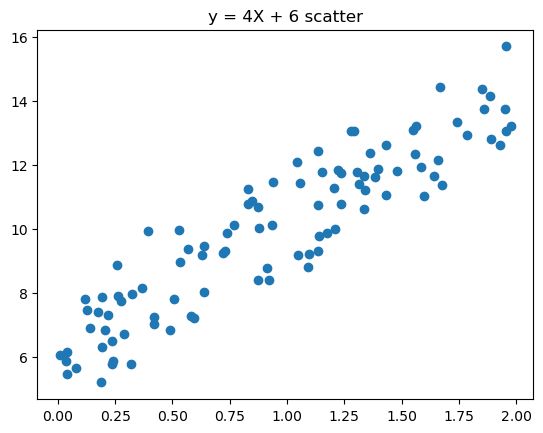

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y= 4X+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1) # 뒤에 더한 배열이 노이즈

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)
plt.title('y = 4X + 6 scatter')
plt.show()

- w1을 4에 가까운 값으로, w0을 6에 가까운 값으로 도출
- 먼저 w1과 w0을 0으로 초기화한 뒤 특정 횟수만큼 반복하면서 w1과 w0을 업데이트
- 업데이트 된 w1과 w0을 비용함수에 적용해 최솟값을 구하는 과정

In [7]:
# w1과 w0를 업데이트 할 w1_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # T 메소드 : 행렬 전치, dot함수 : 행렬곱
    diff = y-y_pred # 실제 값과 예측 값의 차이 -> 잔차
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1)) # 1이 1개씩있는 리스트 100개
    
    # w1과 w0을 업데이트 할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [8]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1,w0

In [9]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=10000)
print('w1:{0:.3f}, w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968, w0:6.222
Gradient Descent Total Cost : 0.9924


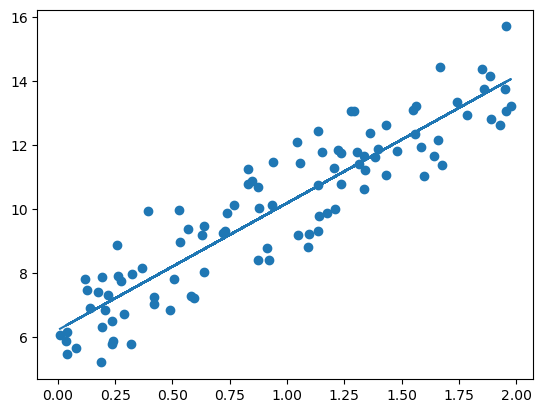

In [10]:
plt.scatter(X,y)
plt.plot(X, y_pred)

- 일반 경사 하강법은 시간이 오래걸림
- 그래서 실전에서는 대부분 확률적 경사 하강법을 이용
- 확률적 경사 하강법 : 일부 데이터만 이용해 w가 업데이트 되는 값을 계산함

In [11]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 1000000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X와 sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1 : {0:.3f}, w0 : {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('확률적 경사 하강법 비용 : {0:.4f}'.format(get_cost(y, y_pred)))

w1 : 4.028, w0 : 6.156
확률적 경사 하강법 비용 : 0.9937


## 다항 회귀와 과(대)적합/과소적합 이해
- Polynomial
- 선형회귀 O, 비선형회귀 X

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]dml 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeautres를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 :\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 :
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [15]:
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 값 :\n',X)
y = polynomial_func(X)
print('삼차 다항식 결정 값 :\n', y)

일차 단항식 계수 값 :
 [[0 1]
 [2 3]]
삼차 다항식 결정 값 :
 [[ 1  5]
 [17 43]]


In [17]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 피처 :\n', poly_ftr)

# 선형 회귀에 3차 다항식 계수 피처와 3차 다항식 결정 값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수 :\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape :\n', model.coef_.shape)

3차 다항식 계수 피처 :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 :
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape :
 (2, 10)


In [19]:
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X + X**2 + X**3
    return y

# Pipeline 객체로 단소하게 다항식 피처 변환과 선형 회귀를 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수 :\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 :
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
